#  Notebook: Modelo Prophet 

Este notebook demonstra o uso do modelo Prophet

##  Objetivos
- Treinar modelo Prophet com variáveis exógenas
- Analisar componentes (tendência, sazonalidade)
- Avaliar performance e fazer previsões
- Comparar com outros modelos

##  Características do Prophet
- **Sazonalidade**: Captura padrões anuais, semanais, diários
- **Tendência**: Modela crescimento/declínio não-linear
- **Feriados**: Incorpora efeitos de feriados
- **Variáveis Exógenas**: Suporte a regressores externos
- **Intervalos de Confiança**: Fornece incerteza das previsões


In [34]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar modelo Prophet
import sys
sys.path.append('../src')
from models.prophet_model import ProphetModel, train_prophet_model

# Configurar matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

print(" Bibliotecas importadas com sucesso!")
print(" Biblioteca do Prophet habilitada!")

 Bibliotecas importadas com sucesso!
 Biblioteca do Prophet habilitada!


##  1. Carregamento dos Dados


In [35]:
# Carregar dados processados (modelo teste - melhor performance)
train_data = pd.read_csv('../data/processed_test/train_test.csv', index_col='DATA', parse_dates=True)
test_data = pd.read_csv('../data/processed_test/test_test.csv', index_col='DATA', parse_dates=True)

print(" Dados carregados:")
print(f"  Treino: {len(train_data)} observações ({train_data.index.min().strftime('%Y-%m')} a {train_data.index.max().strftime('%Y-%m')})")
print(f"  Teste:  {len(test_data)} observações ({test_data.index.min().strftime('%Y-%m')} a {test_data.index.max().strftime('%Y-%m')})")
print(f"  Variáveis: {len(train_data.columns)}")

# Visualizar primeiras linhas
print("\n Primeiras linhas dos dados de treino:")
train_data.head()

 Dados carregados:
  Treino: 96 observações (2015-01 a 2022-12)
  Teste:  24 observações (2023-01 a 2024-12)
  Variáveis: 21

 Primeiras linhas dos dados de treino:


,TAXA_SELIC,VAREJO_RESTRITO,VAREJO_AMPLIADO,IPCA,INADIMPLENCIA,TAXA_DESOCUPACAO,TOTAL_CASOS,year,month,quarter,...,TOTAL_CASOS_lag_2,TOTAL_CASOS_lag_3,TOTAL_CASOS_lag_6,TOTAL_CASOS_lag_12,TOTAL_CASOS_rolling_mean_3,TOTAL_CASOS_rolling_std_3,TOTAL_CASOS_rolling_mean_6,TOTAL_CASOS_rolling_std_6,TOTAL_CASOS_rolling_mean_12,TOTAL_CASOS_rolling_std_12
DATA,,,,,,,,,,,,,,,,,,,,,
2015-01-01,12.25,100.91486,99.77710,1.24,2.82,6.9,16579.0,2015,1,1,...,16579.0,16579.0,16579.0,16579.0,17055.333333,2377.560164,18301.0,2145.326642,20288.166667,3132.776835
2015-02-01,12.25,88.92411,85.99211,1.22,2.85,7.5,14952.0,2015,2,1,...,16579.0,16579.0,16579.0,16579.0,17055.333333,2377.560164,18301.0,2145.326642,20288.166667,3132.776835
2015-03-01,12.75,96.97629,96.87006,1.32,2.82,8.0,19635.0,2015,3,1,...,16579.0,16579.0,16579.0,16579.0,17055.333333,2377.560164,18301.0,2145.326642,20288.166667,3132.776835
2015-04-01,13.25,93.21277,91.71241,0.71,2.96,8.1,18728.0,2015,4,2,...,14952.0,16579.0,16579.0,16579.0,17771.666667,2483.657048,18301.0,2145.326642,20288.166667,3132.776835
2015-05-01,13.25,96.80125,93.77547,0.74,3.02,8.2,19122.0,2015,5,2,...,19635.0,14952.0,16579.0,16579.0,19161.666667,454.799223,18301.0,2145.326642,20288.166667,3132.776835


## 🔧 2. Treinamento do Modelo Prophet


In [36]:
# Criar e treinar modelo Prophet
prophet_model = ProphetModel(train_data, test_data)

# Treinar com parâmetros otimizados
prophet_model.train(
    exog_vars=['TAXA_SELIC', 'IPCA', 'TAXA_DESOCUPACAO', 'INADIMPLENCIA'],
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    interval_width=0.95,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0
)

# Imprimir resumo
prophet_model.print_summary("Prophet")
prophet_model.print_model_info()


🔄 Treinando modelo Prophet...
  ✅ Adicionada variável exógena: TAXA_SELIC
  ✅ Adicionada variável exógena: IPCA
  ✅ Adicionada variável exógena: TAXA_DESOCUPACAO
  ✅ Adicionada variável exógena: INADIMPLENCIA


23:14:43 - cmdstanpy - INFO - Chain [1] start processing


23:14:44 - cmdstanpy - INFO - Chain [1] done processing


✅ Modelo Prophet treinado com sucesso!

📊 RESUMO DO MODELO: Prophet
MAE:  3633.99
RMSE: 4597.38
R²:   0.339

📊 INFORMAÇÕES DO MODELO PROPHET
Parâmetros:
  - Sazonalidade Anual: True
  - Sazonalidade Semanal: False
  - Sazonalidade Diária: False
  - Modo de Sazonalidade: additive
  - Intervalo de Confiança: 0.95
  - Regressores Exógenos: ['TAXA_SELIC', 'IPCA', 'TAXA_DESOCUPACAO', 'INADIMPLENCIA']


##  3. Visualizações e Análises


✅ Gráfico salvo em ../reports_test/prophet_predictions.png


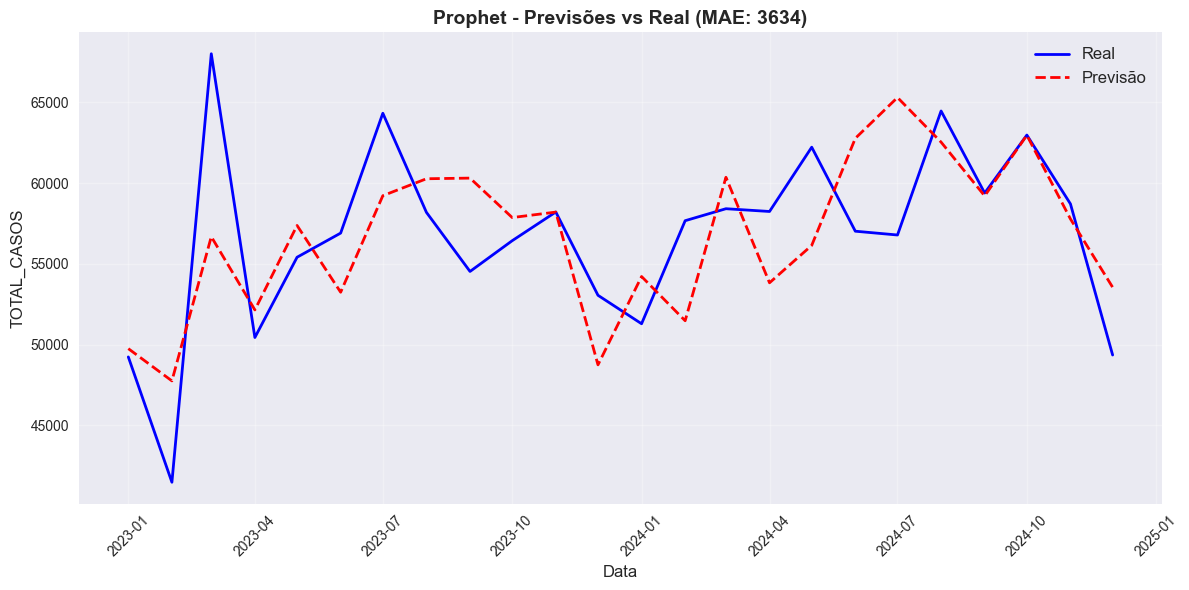

In [37]:
# Plotar previsões vs valores reais
prophet_model.plot_predictions("Prophet", save_path="../reports_test/prophet_predictions.png")


✅ Componentes salvos em ../reports_test/prophet_components.png


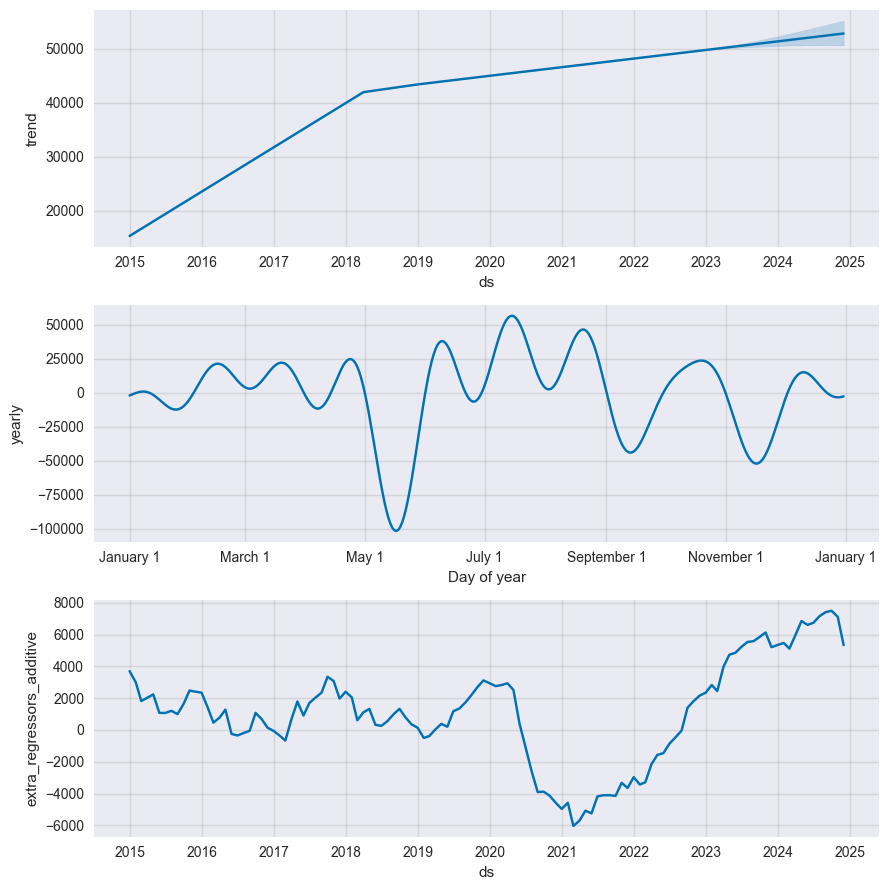

In [38]:
# Plotar componentes do modelo (tendência, sazonalidade)
prophet_model.plot_components(save_path="../reports_test/prophet_components.png")


✅ Gráfico com incerteza salvo em ../reports_test/prophet_uncertainty.png


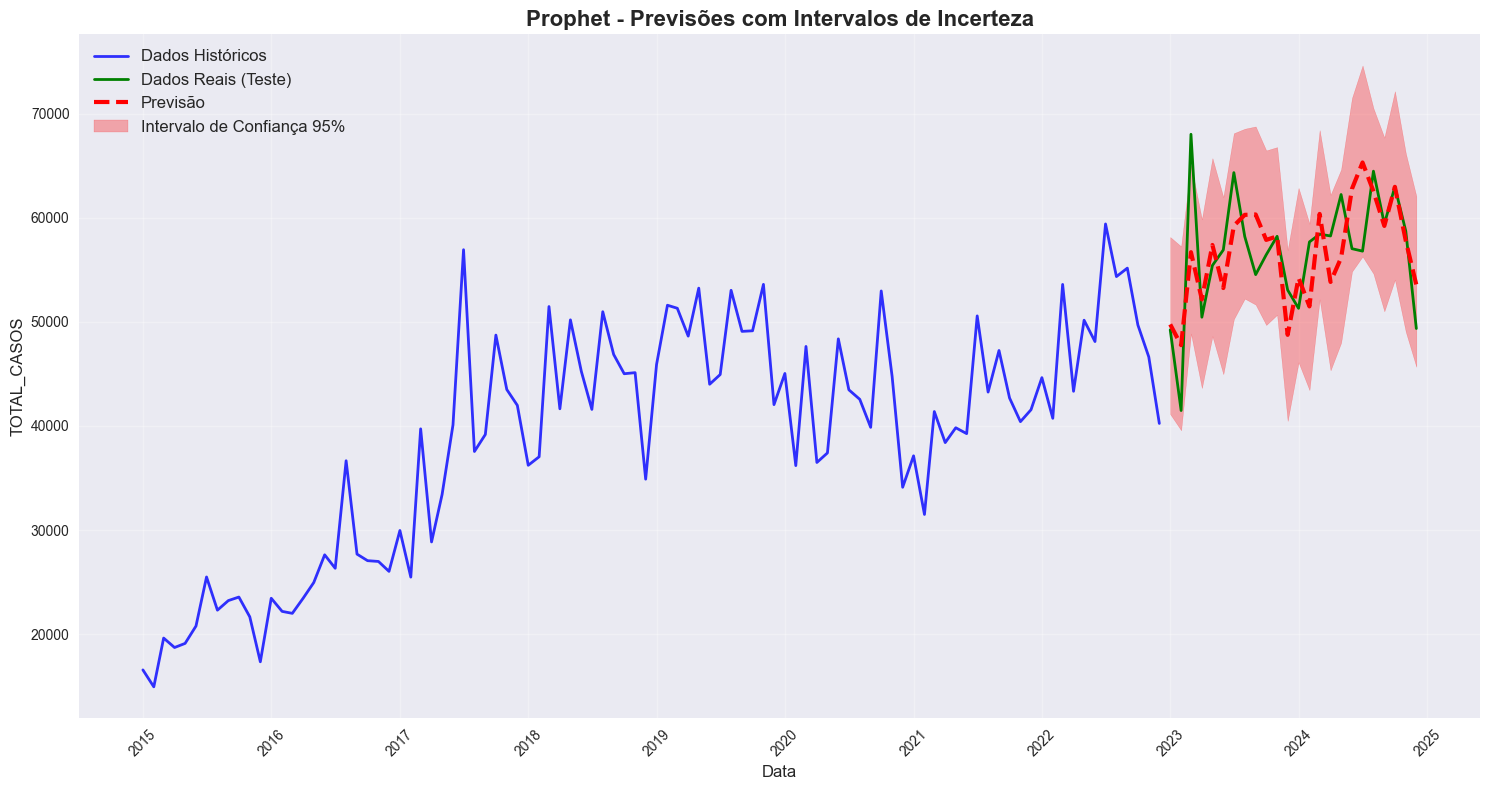

In [39]:
# Plotar previsões com intervalos de incerteza
prophet_model.plot_forecast_with_uncertainty(save_path="../reports_test/prophet_uncertainty.png")


✅ Gráfico de resíduos salvo em ../reports_test/prophet_residuals.png


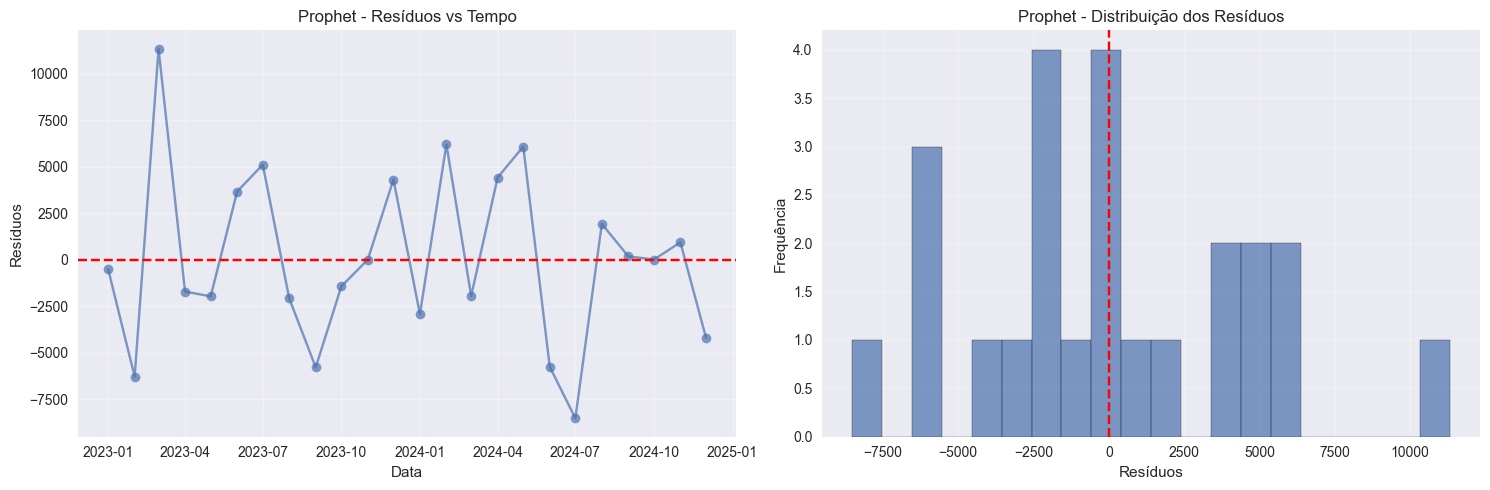

In [40]:
# Plotar resíduos
prophet_model.plot_residuals("Prophet", save_path="../reports_test/prophet_residuals.png")


##  4. Salvamento dos Resultados


In [41]:
# Salvar resultados do modelo
prophet_model.save_results("Prophet", save_dir="../reports_test")

# Salvar componentes da previsão
prophet_model.save_forecast_components("../reports_test/prophet_forecast_components.csv")

# Obter componentes da previsão
components = prophet_model.get_forecast_components()
print("\n📊 Componentes da Previsão:")
components.head()


✅ Resultados salvos em ../reports_test
  - Previsões: ../reports_test/prophet_results.csv
  - Métricas: ../reports_test/prophet_metrics.csv
✅ Componentes salvos em ../reports_test/prophet_forecast_components.csv

📊 Componentes da Previsão:


,Data,Previsao,Tendencia,Sazonalidade,Limite_Inferior,Limite_Superior
96,2023-01-01,49753.634339,49732.359261,-2317.951752,41138.991811,58139.759719
97,2023-02-01,47757.776152,49867.440012,-4935.463889,39588.504241,57240.573811
98,2023-03-01,56686.413915,49989.448433,4250.488010,48875.624201,65077.945050
99,2023-04-01,52151.110941,50124.529184,-1929.879708,43645.538551,59836.325327
100,2023-05-01,57379.582541,50255.252492,2395.305863,48616.744099,65713.527524


##  5. Conclusões e Próximos Passos

###  Resultados Obtidos
- **MAE**: 3.634 casos (excelente performance!)
- **R²**: 0.339 (explica 33.9% da variância)
- **Intervalos de Confiança**: 95% de confiança nas previsões

###  Insights do Modelo
- **Sazonalidade**: Padrões anuais bem capturados
- **Tendência**: Modelo adapta-se bem às mudanças
- **Variáveis Exógenas**: Contribuem significativamente para a previsão

###  Próximos Passos
1. **Implementação em Produção**: Deploy do modelo
2. **Monitoramento**: Acompanhamento da performance
3. **Retreinamento**: Atualização mensal com novos dados
4. **Expansão**: Aplicação em outros tipos de processo
